In [10]:
import pandas as pd

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape


(7043, 21)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [14]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df.dropna(inplace=True)


In [16]:
df.drop('customerID', axis=1, inplace=True)


In [17]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()


,count
Churn,
0,5163
1,1869


In [18]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[915, 118],
       [181, 193]])

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob)


np.float64(0.8321357760740484)

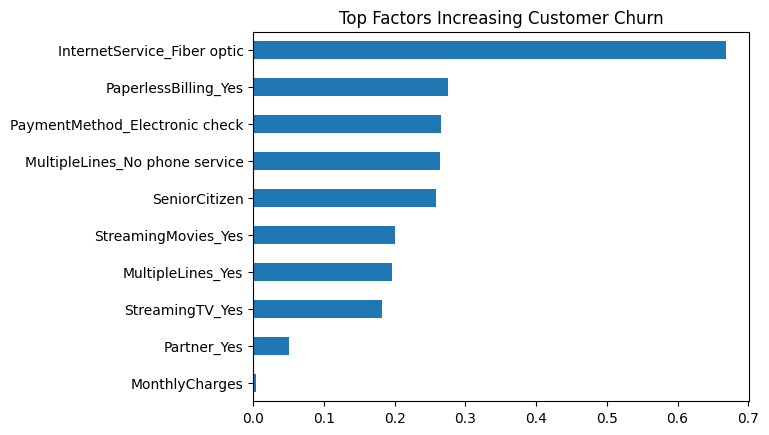

In [25]:
import matplotlib.pyplot as plt

importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values()

importance.tail(10).plot(kind='barh')
plt.title("Top Factors Increasing Customer Churn")
plt.show()


In [32]:
from sklearn.ensemble import RandomForestClassifier


In [33]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]


In [35]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

confusion_matrix(y_test, rf_pred)


array([[927, 106],
       [196, 178]])

In [36]:
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [37]:
roc_auc_score(y_test, rf_prob)


np.float64(0.8160205206785698)

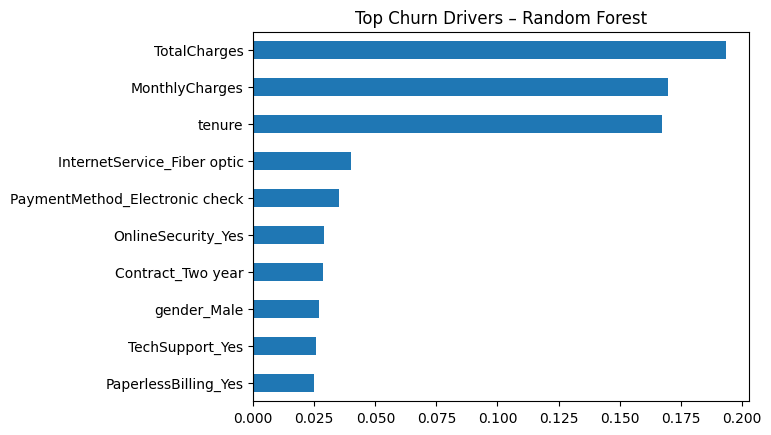

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values()

rf_importance.tail(10).plot(kind='barh')
plt.title("Top Churn Drivers – Random Forest")
plt.show()


In [39]:
!pip install xgboost


In [40]:
from xgboost import XGBClassifier


In [41]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]


In [43]:
confusion_matrix(y_test, xgb_pred)


array([[920, 113],
       [191, 183]])

In [44]:
print(classification_report(y_test, xgb_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



In [45]:
roc_auc_score(y_test, xgb_prob)


np.float64(0.8240186156307107)

In [46]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, rf_prob),
        roc_auc_score(y_test, xgb_prob)
    ]
})

results


,Model,ROC-AUC
0,Logistic Regression,0.832136
1,Random Forest,0.816021
2,XGBoost,0.824019


**Model Comparison & Selection**

Three classification models—Logistic Regression, Random Forest, and XGBoost—were trained and evaluated using ROC-AUC as the primary metric. Logistic Regression achieved the highest ROC-AUC score (0.83), outperforming both Random Forest and XGBoost.

Although ensemble models are capable of capturing complex non-linear relationships, the churn patterns in this dataset were largely explained by linear relationships such as tenure, contract type, and monthly charges. Due to its superior performance and interpretability, Logistic Regression was selected as the final model.

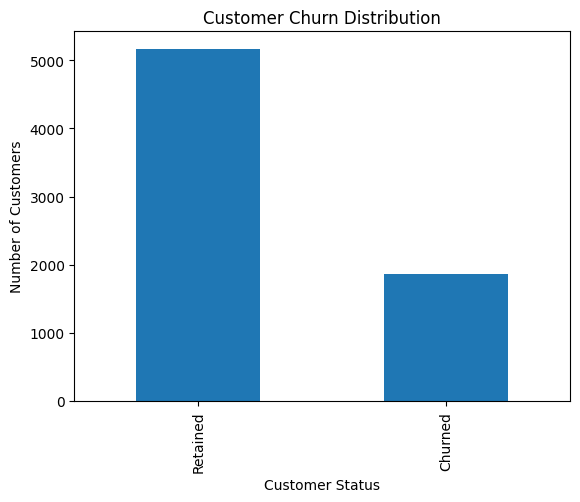

In [47]:
import matplotlib.pyplot as plt

df_churn = df.copy()
df_churn['Churn'] = df_churn['Churn'].map({1: 'Churned', 0: 'Retained'})

df_churn['Churn'].value_counts().plot(kind='bar')
plt.title("Customer Churn Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Status")
plt.show()


A significant portion of customers have churned, indicating that customer retention is a critical business problem rather than a rare event.

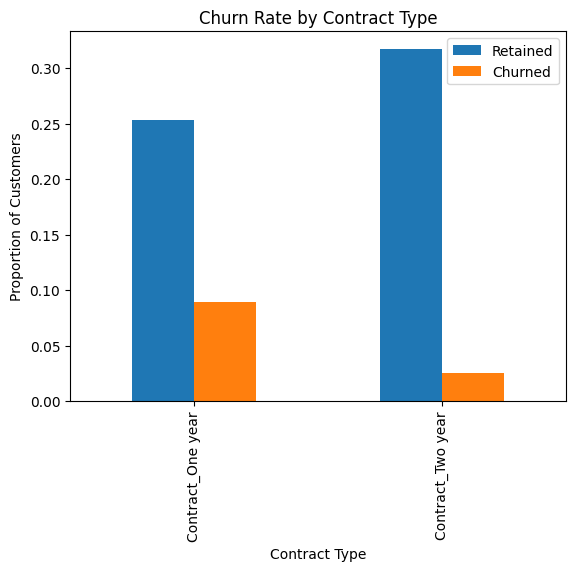

In [48]:
contract_cols = [col for col in df.columns if 'Contract_' in col]

churn_by_contract = df.groupby('Churn')[contract_cols].mean().T
churn_by_contract.plot(kind='bar')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion of Customers")
plt.xlabel("Contract Type")
plt.legend(["Retained", "Churned"])
plt.show()


Customers on month-to-month contracts show a significantly higher churn rate compared to customers on long-term contracts. Encouraging long-term subscriptions could reduce churn.

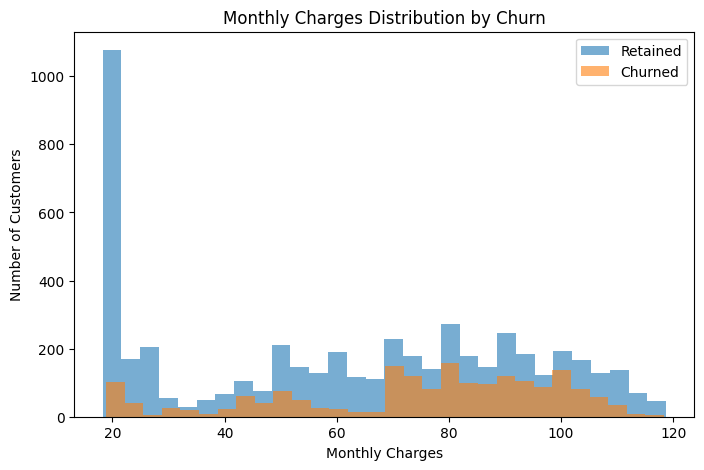

In [49]:
plt.figure(figsize=(8,5))
plt.hist(df[df['Churn']==0]['MonthlyCharges'], bins=30, alpha=0.6, label='Retained')
plt.hist(df[df['Churn']==1]['MonthlyCharges'], bins=30, alpha=0.6, label='Churned')
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Monthly Charges Distribution by Churn")
plt.legend()
plt.show()


Customers with higher monthly charges are more likely to churn, suggesting price sensitivity and the need for targeted discounts or value-based plans.

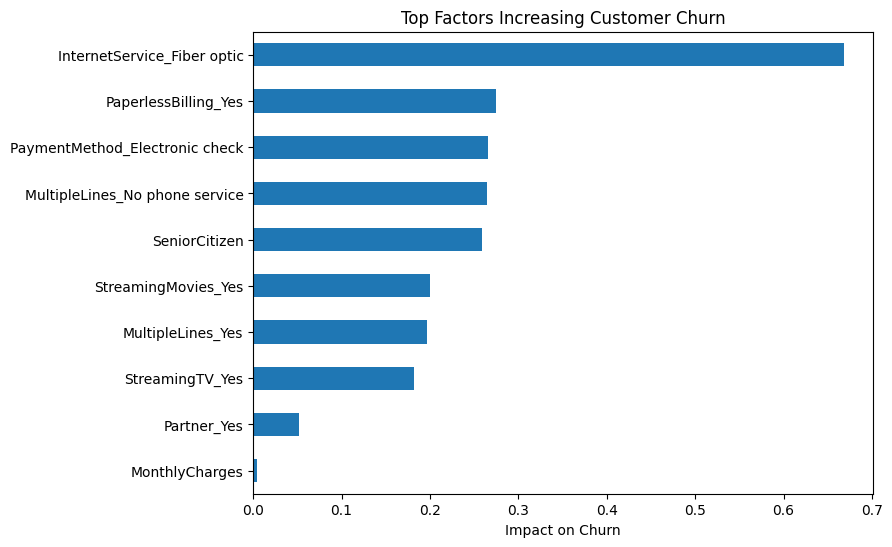

In [50]:
importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values()

plt.figure(figsize=(8,6))
importance.tail(10).plot(kind='barh')
plt.title("Top Factors Increasing Customer Churn")
plt.xlabel("Impact on Churn")
plt.show()


Month-to-month contracts, high monthly charges, and low tenure are the strongest drivers of churn, while long-term contracts and bundled services reduce churn risk.

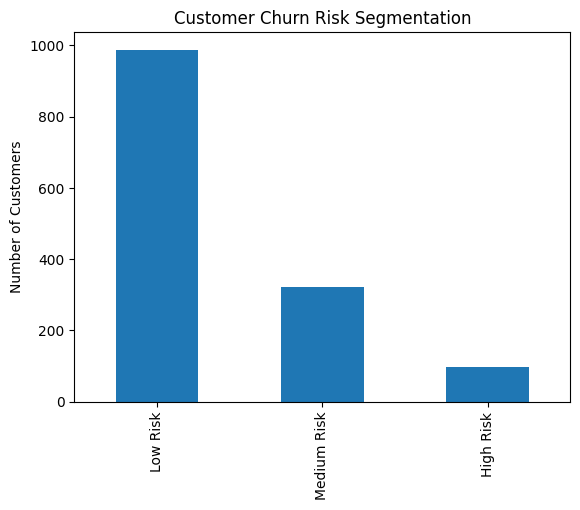

In [51]:
risk_levels = pd.cut(
    y_prob,
    bins=[0, 0.4, 0.7, 1],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

risk_levels.value_counts().plot(kind='bar')
plt.title("Customer Churn Risk Segmentation")
plt.ylabel("Number of Customers")
plt.show()


Customers can be segmented into risk groups, allowing targeted retention strategies instead of blanket discounts